**ФИО: Бочарова Дарья Алексеевна, Гарькина Анастасия Константиновна**



## Project


__Тема:__ Экология в разных странах мира за 2022 год

__Цель:__ Посмотреть на зависимость между экологической обстановкой и смертностью в странах мира за 2022 год

__Гипотеза:__ Страны с высоким индексом активно инвестируют в экологию своей территории. Стоит повышать государственные затраты на обеспечение устанения проблем с экологией, что позволит снизить уровень смертности граждан(для этого впоследствии будут добавлены данные по финансовым вложениям стран)

## Сбор данных

На данном шаге мы будем создавать датасет; это будет происходить в несколько этапов, поскольку данные достаются с разных сайтов. Необходимы индекс экологической эффективности и уровень смертности в странах мира

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import urllib.request



Сначала берем данные об индексе экологической эффективности

Источник: https://epi.yale.edu/epi-results/2022/component/epi

In [2]:
url = "https://epi.yale.edu/epi-results/2022/component/epi" #первый источник с индексами
response = requests.get(url)
print(response) #результат 200, можно работать 

bs = BeautifulSoup(response.text, "lxml") #получаем исходный код
data = []

table1 = bs.find('table', class_="epi-tlarecord-countryrows") #достаем из исходного кода нужные данные
rows = table1.find_all('tr')

for row in rows[1:]:  # пропускаем первую строку, чтобы убрать заголовки столбцов
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

data = pd.DataFrame(data, columns=['Country', 'Rank', 'Index', 'Ten_year_change'])


data.drop('Rank', axis=1, inplace=True) #удаляем столбец с номерами стран 

data_sorted = data.sort_values(by='Country') #отсортируем данные так, чтобы страны шли в алфавитном порядке, это нужно для облегчения процесса  дальнейшего сведения таблиц

data_sorted = data_sorted.sort_values(by='Country', ignore_index=True) #отсортируем данные по столбцу 'Country' с игнорированием нумерации
print(data_sorted.shape)
data_sorted.head()


<Response [200]>
(180, 3)


,Country,Index,Ten_year_change
0,Afghanistan,43.60,23.90
1,Albania,47.10,9.90
2,Algeria,29.60,-4.00
3,Angola,30.50,0.20
4,Antigua and Barbuda,52.40,9.70


__Описание столбцов:__

* `Country` -  название страны
* `Index` - уровень экологии
* `ten_year_change` - изменения за последние 10 лет




Теперь достаем данные о ежегодной смертности людей в разных странах мира

Источник: https://database.earth/population/deaths/2022

In [3]:
url = "https://database.earth/population/deaths/2022" 
response = requests.get(url)
print(response) #результат 200, можно работать 

bs = BeautifulSoup(response.text, "lxml") #получаем исходный код
data = []

table1 = bs.find('table', class_="table-fixed w-full") #достаем из исходного кода нужные данные
rows = table1.find_all('tr')

for row in rows[1:]:  # пропускаем первую строку, чтобы убрать заголовки столбцов
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

data = pd.DataFrame(data, columns=['Rank', 'Country', 'Annual_Deaths', 'Male_Deaths', 'Female_Deaths'])


data.drop('Rank', axis=1, inplace=True) #удаляем столбец с номерами стран

data_sorted1 = data.sort_values(by='Country') #отсортируем данные так, чтобы страны шли в алфавитном порядке, это нужно для облегчения процесса  дальнейшего сведения таблиц

data_sorted1 = data_sorted1.sort_values(by='Country', ignore_index=True) #отсортируем данные по столбцу 'Country' с игнорированием нумерации

data_sorted1['Country'] = data_sorted1['Country'].str.replace(r'[^\x00-\x7F]+', '', regex=True) # убираем флаги с помощью этой страшной штуки, так как те символы не ASCII, подводка к gpt аналогична 



data_sorted1.head()

<Response [200]>


,Country,Annual_Deaths,Male_Deaths,Female_Deaths
0,Andorra,502,279,224
1,United Arab Emirates,"17,609","11,993","5,616"
2,Afghanistan,"284,297","163,410","120,887"
3,Antigua and Barbuda,571,293,278
4,Anguilla,103,64,38


__Описание столбцов:__

* `Country` -  название страны
* `Annual_Deaths` - ежегодная смертность населения
* `Мале_Deaths` - ежегодная смертность населения представителей мужского пола
* `Femале_Deaths` - ежегодная смертность населения представителей женского пола

Численность населения в каждой стране разная, поэтому нет смысла сравнивать, например, маленькую по площади страну с большой - в любом случае у второй смертность будет больше

Поэтому стоит добавить еще и данные по численности населения

Источник: https://database.earth/population/by-country/2022

In [4]:
url = "https://database.earth/population/by-country/2022"
response = requests.get(url) 
print(response) #результат 200, можно работать 

bs = BeautifulSoup(response.text, "lxml") #получаем исходный код
data = []

table1 = bs.find('table', class_="table-fixed w-full") #достаем из исходного кода нужные данные
rows = table1.find_all('tr')

for row in rows[1:]:  # пропускаем первую строку, чтобы убрать заголовки столбцов
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

data = pd.DataFrame(data, columns=['Country', 'Population', 'Overall Population Change +/-'])


data.drop('Overall Population Change +/-', axis=1, inplace=True) #удаляем столбец с изменениями численности населения



data_sorted2 = data.sort_values(by='Country') #отсортируем данные так, чтобы страны шли в алфавитном порядке, это нужно для облегчения процесса  дальнейшего сведения таблиц

data_sorted2 = data_sorted2.sort_values(by='Country', ignore_index=True) #отсортируем данные по столбцу 'Country' с игнорированием нумерации

data_sorted2['Country'] = data_sorted2['Country'].str.replace(r'[^\x00-\x7F]+', '', regex=True) # убираем флаги с помощью этой страшной штуки, так как те символы не ASCII, подводка к gpt аналогична

data_sorted2.head()

<Response [200]>


,Country,Population
0,Andorra,"79,824"
1,United Arab Emirates,"9,441,128"
2,Afghanistan,"41,128,771"
3,Antigua and Barbuda,"93,763"
4,Anguilla,"15,857"


__Описание столбцов:__

* `Country` -  название страны
* `Population` - численность населения в стране


Теперь сведем две последние таблицы и посмотрим на ее размерность

In [5]:
merged_df = pd.merge(data_sorted1, data_sorted2, on='Country', how='inner')

merged_df.head()


,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population
0,Andorra,502,279,224,"79,824"
1,United Arab Emirates,"17,609","11,993","5,616","9,441,128"
2,Afghanistan,"284,297","163,410","120,887","41,128,771"
3,Antigua and Barbuda,571,293,278,"93,763"
4,Anguilla,103,64,38,"15,857"


In [6]:
merged_df.shape

(237, 5)

Первая таблица намного меньше объединенной второй, однако их все равно надо "склеить" по Country

In [7]:
merged_df2 = pd.merge(merged_df, data_sorted, on='Country', how='left')

merged_df2.head()

,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
0,Andorra,502,279,224,"79,824",NaN,NaN
1,United Arab Emirates,"17,609","11,993","5,616","9,441,128",52.40,15.90
2,Afghanistan,"284,297","163,410","120,887","41,128,771",43.60,23.90
3,Antigua and Barbuda,571,293,278,"93,763",52.40,9.70
4,Anguilla,103,64,38,"15,857",NaN,NaN



Первичный датасет готов, можно приступать к следующему шагу

(первичный, поскольку, вероятнее всего, для МО потребуются еще и категориальные данные)

##  EDA



На данном этапе будет выполнен анализ полученного датасета

Для начала проверим, есть ли в текущих данных пропуски и отсортируем их (при наличии)

In [8]:
merged_df2.isnull().sum().sort_values(ascending=False)

Index              72
Ten_year_change    72
Country             0
Annual_Deaths       0
Male_Deaths         0
Female_Deaths       0
Population          0
dtype: int64

Как видим, пропусков достаточно много. Это связано с тем, что в первом источнике стран меньше, чем во втором и третьем. Заменим их на что-то нейтральное с помощью метода .fillna()



In [9]:
med = merged_df2.Index.median()
merged_df2.fillna(med, inplace=True)
merged_df2.head()

,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
0,Andorra,502,279,224,"79,824",42.4,42.4
1,United Arab Emirates,"17,609","11,993","5,616","9,441,128",52.40,15.90
2,Afghanistan,"284,297","163,410","120,887","41,128,771",43.60,23.90
3,Antigua and Barbuda,571,293,278,"93,763",52.40,9.70
4,Anguilla,103,64,38,"15,857",42.4,42.4


Насколько правильно было использовать медианное значение пока непонятно, так как нужно посмотреть на зависимость с численностью населения. В противном случае сделаем выборсы.

А пока уберем запятые в первых четырех числовых столбцах в таблице.

In [10]:
df = merged_df2.replace(',', '', regex=True)

df.head()

,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
0,Andorra,502,279,224,79824,42.4,42.4
1,United Arab Emirates,17609,11993,5616,9441128,52.40,15.90
2,Afghanistan,284297,163410,120887,41128771,43.60,23.90
3,Antigua and Barbuda,571,293,278,93763,52.40,9.70
4,Anguilla,103,64,38,15857,42.4,42.4


##  Визуализация

На данном этапе рассмотрим подробнее страны по категориям

Отсортируем таблицу по столбцу Population в порядке возрастания и посмотрим на значения индекса экологической эффективности (десятилетний период нас пока не интересует)

Зачем это делается: пока что у маленьких по численности населения стран присуствуют медианные значения. Если у других стран с похожими значениями в столбце Population слишком маленькие показатели столбца Index, это наводит на мысль о необходимости произведения выбросов/ взятия медианного значения именно среди индексов более маленьких по численности стран, а не общего медианного.

In [11]:
df['Population'] = df['Population'].astype(int)

df_population = df.sort_values(by='Population', ignore_index=True)

df_population.head(50)




,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
0,Holy See,10,5,5,510,42.4,42.4
1,Tokelau,14,6,7,1871,42.4,42.4
2,Niue,27,12,14,1934,42.4,42.4
3,Falkland Islands (Malvinas),27,15,12,3780,42.4,42.4
4,Montserrat,50,30,20,4390,42.4,42.4
5,Saint Helena,96,59,37,5374,42.4,42.4
6,Saint Pierre and Miquelon,71,38,33,5862,42.4,42.4
7,Saint Barthlemy,61,34,27,10967,42.4,42.4
8,Tuvalu,115,68,46,11312,42.4,42.4
9,Wallis and Futuna Islands,77,40,37,11572,42.4,42.4


Оказалось, что проблема совсем не в том, что пропуски могут быть слишком большими по значению при условии небольшой численности населения. В первых 30 странах вообще отсуствует информация об индексе. Медианные показатели в этих пропусках могут сильно испортить визуализацию, поэтому, скорее всего, придется делать выбросы.

Пока представим это распределение на точечном графике

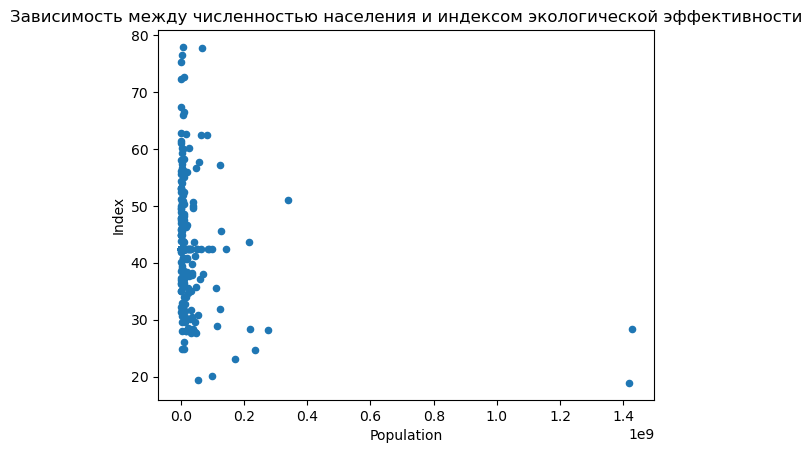

In [12]:
import matplotlib.pyplot as plt

df_population.plot(x='Population', y='Index', kind='scatter')

plt.xlabel('Population')
plt.ylabel('Index')
plt.title('Зависимость между численностью населения и индексом экологической эффективности')  

plt.show() 

Распределение вышло непонятным, поэтому все-таки делать выбросы придется

In [ ]:

import matplotlib.pyplot as plt

df.plot(x='Annual_Deaths', y='Index', kind='scatter')

plt.xlabel('Annual_Deaths')
plt.ylabel('Index')
plt.xlim(10, 300000)

plt.xticks(range(0, 300000)) 
plt.title('Зависимость между ежегодной смертностью и индексом экологической эффективности')  

plt.show() # после добавления диапазона значений график перестал нормально запускаться, это исправим

На этом графике хотели показать, наличие/отсуствие зависимости между ежегодной смертностью и индексом экологической эффективности.
Если эта зависимость прослеживается, то первичная гипотеза подтверждается. Значит, можно работать дальше

##  МО


Мы хотим обучить модель предсказывать, сколько нужно использовать "зеленых" инвестиций, чтобы снизить уровень загрязнения и, соответственно, смертности (гипотеза представлена в самом начале)

Трудность, с которой мы пока что сталкиваемся: не супер легко найти данные о зеленых инвестициях: их либо нет в желаемом формате по представленным выше странам, либо информация не раскрывается

Мы очень постараемся решить эту проблему, в противном случае придется менять гипотезу, цель МО и возможно часть данных

**Но теоретически план таков:**

1) Добавляем данные об объеме инвестирования страны в экологию

2) Смотрим на соотношение инвестиций со смертностью и индексом экологии

3) Если видим, что страны, которые активно инвестируют в экологию (то есть стараются обеспечить чистую среду), имеют высокие показатели (являются "экологически чистыми"), то гипотеза подтверждена 

4) Уровень смертности, конечно, зависит не только от экологии, но это является, на наш взгляд, одним из самых решающих факторов, поэтому хотелось бы обучить модель так, чтобы она предсказывала, сколько нужно вкладывать в экологию своей страны, чтобы уменьшить уровень смертности 

Пока что это выглядит очень абстрактным и для нас, хотя бы из-за того, что не очень понятно, где достать так много данных и где найти данные о финансировании.......

Именно из-за этого может получиться так, что EDA и визуализация не окончательные, так как в случае неудачи и очень сильном желании довести начатое до конца, придется поменять данные. Это неминуемо ведет к обновлению EDA и визуализации

***P.S. по этой части особенно сильно хочется получить фитбэк, так как если идея сразу похожа на абсурд, то мы попытаемся как-то это пофиксить***